In [22]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# zerodha----paid data
# alphavantage----no NSE/BSE data
# quandl----no intraday data
# yfinance----working

# https://algotrading101.com/learn/google-finance-api-guide/
# https://github.com/ranaroussi/yfinance

In [24]:
!pip install autoscraper
!pip install python-dateutil
!pip install yfinance

In [25]:
#gettting list of NIFTY50 stocks
from autoscraper import AutoScraper

url='https://en.wikipedia.org/wiki/NIFTY_50'
want_list=['ADANIPORTS.NS']

#scrapping data from wikipedia
scraper=AutoScraper()
n50=scraper.build(url,want_list)

n50=n50[0:50]
print(n50)

['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']


In [26]:
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta

# we can only get last 60 days intraday day
# so, setting dates accordingly
end=str(date.today())
start=str(date.today()+relativedelta(months=-2,days=+1))

# appending symbols into a single string
symbols_str=""
for s in n50:
    symbols_str+=s+" "
    
# downloading last 60 days intraday(interval=2 mins) data of all symbols
data=yf.download(tickers=symbols_str,interval='2m',auto_adjust=True,start=start,end=end)

[*********************100%***********************]  50 of 50 completed


In [46]:
#checking nan values
close={}
for symbol in n50:
    close[symbol]=data['Close'][symbol].to_numpy()
    print(symbol,np.count_nonzero(np.isnan(close[symbol])))

ADANIPORTS.NS 3
ASIANPAINT.NS 2
AXISBANK.NS 2
BAJAJ-AUTO.NS 2
BAJFINANCE.NS 2
BAJAJFINSV.NS 2
BHARTIARTL.NS 2
BPCL.NS 2
BRITANNIA.NS 2
CIPLA.NS 3
COALINDIA.NS 2
DIVISLAB.NS 3
DRREDDY.NS 2
EICHERMOT.NS 2
GRASIM.NS 3
HCLTECH.NS 2
HDFC.NS 2
HDFCBANK.NS 2
HDFCLIFE.NS 2
HEROMOTOCO.NS 4
HINDALCO.NS 2
HINDUNILVR.NS 2
ICICIBANK.NS 2
INDUSINDBK.NS 2
INFY.NS 2
IOC.NS 2
ITC.NS 2
JSWSTEEL.NS 2
KOTAKBANK.NS 2
LT.NS 1
M&M.NS 2
MARUTI.NS 2
NESTLEIND.NS 3
NTPC.NS 1
ONGC.NS 2
POWERGRID.NS 2
RELIANCE.NS 2
SBIN.NS 2
SBILIFE.NS 2
SHREECEM.NS 4
SUNPHARMA.NS 2
TATAMOTORS.NS 2
TATASTEEL.NS 2
TCS.NS 2
TATACONSUM.NS 2
TECHM.NS 2
TITAN.NS 2
ULTRACEMCO.NS 2
UPL.NS 2
WIPRO.NS 2


In [47]:
#removing nan values
for symbol in n50:
    close[symbol]= [c for c in close[symbol] if not np.isnan(c)] 
    print(symbol,np.count_nonzero(np.isnan(close[symbol])))

ADANIPORTS.NS 0
ASIANPAINT.NS 0
AXISBANK.NS 0
BAJAJ-AUTO.NS 0
BAJFINANCE.NS 0
BAJAJFINSV.NS 0
BHARTIARTL.NS 0
BPCL.NS 0
BRITANNIA.NS 0
CIPLA.NS 0
COALINDIA.NS 0
DIVISLAB.NS 0
DRREDDY.NS 0
EICHERMOT.NS 0
GRASIM.NS 0
HCLTECH.NS 0
HDFC.NS 0
HDFCBANK.NS 0
HDFCLIFE.NS 0
HEROMOTOCO.NS 0
HINDALCO.NS 0
HINDUNILVR.NS 0
ICICIBANK.NS 0
INDUSINDBK.NS 0
INFY.NS 0
IOC.NS 0
ITC.NS 0
JSWSTEEL.NS 0
KOTAKBANK.NS 0
LT.NS 0
M&M.NS 0
MARUTI.NS 0
NESTLEIND.NS 0
NTPC.NS 0
ONGC.NS 0
POWERGRID.NS 0
RELIANCE.NS 0
SBIN.NS 0
SBILIFE.NS 0
SHREECEM.NS 0
SUNPHARMA.NS 0
TATAMOTORS.NS 0
TATASTEEL.NS 0
TCS.NS 0
TATACONSUM.NS 0
TECHM.NS 0
TITAN.NS 0
ULTRACEMCO.NS 0
UPL.NS 0
WIPRO.NS 0


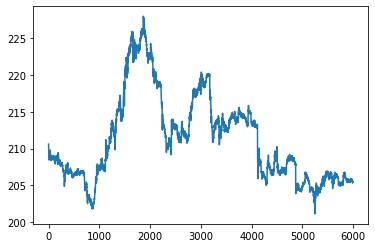

In [48]:
# plot of closing price of ITC stock
plt.plot(close['ITC.NS'])

In [49]:
# scaling data in range (0,1)
from sklearn.preprocessing import MinMaxScaler

scaler={}
for symbol,arr in close.items():
    # defining min max scaler for the symbol
    scaler[symbol]=MinMaxScaler(feature_range=(0,1))
    
    # scaling data
    arr=scaler[symbol].fit_transform(np.array(arr).reshape(-1, 1))
    close[symbol]=np.array(arr)
    

In [50]:
# generate sequence data to feed to RNN
# X:[a0 a1 a2 ...... a59] Y:[a60] seq_size=60

def generate_seq_data(data,seq_size):
    #all elements except last index is X and last index is Y
    seq_data=[]
    for i in range(seq_size,len(data)):
        seq_data.append(data[i-seq_size:i+1])
        
    return np.array(seq_data,dtype="object").reshape(len(seq_data),seq_size+1)

seq_data={}
for symbol in n50:
    seq_data[symbol]=generate_seq_data(close[symbol],60)


In [51]:
seq_data['ITC.NS'].shape

(5935, 61)

In [53]:
X_train,Y_train,X_test,Y_test=[],[],[],[]
splitted_data={}

for symbol in n50:
    sd=seq_data[symbol]
    
    # splitting in 80:20 ratio
    split_index=int(0.8*len(sd))
    train=sd[0:split_index]
    test=sd[split_index:]
    
    X_train.extend(train[:,:-1]) # all columns except last
    Y_train.extend(train[:,-1]) # last column
    
    X_test.extend(test[:,:-1]) # all columns except last
    Y_test.extend(test[:,-1]) # last column

    splitted_data[symbol]=[X_train,Y_train,X_test,Y_test]
    
X_train,Y_train,X_test,Y_test=np.array(X_train),np.array(Y_train),np.array(X_test),np.array(Y_test)


In [34]:
print(X_train.shape)
print(Y_train.shape)

(237391, 60)
(237391,)


In [35]:
print(X_test.shape)
print(Y_test.shape)

(59352, 60)
(59352,)


In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1] ,1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [38]:
# stacked LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=X_train[0].shape))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
X_train=np.asarray(X_train).astype(np.float32)
Y_train=np.asarray(Y_train).astype(np.float32)
X_test=np.asarray(X_test).astype(np.float32)
Y_test=np.asarray(Y_test).astype(np.float32)

In [41]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=128,verbose=1)

Epoch 1/5
1855/1855 [==============================] - 97s 50ms/step - loss: 0.0042 - val_loss: 2.2773e-04
Epoch 2/5
1855/1855 [==============================] - 91s 49ms/step - loss: 1.7025e-04 - val_loss: 1.0788e-04
Epoch 3/5
1855/1855 [==============================] - 91s 49ms/step - loss: 1.1057e-04 - val_loss: 9.5982e-05
Epoch 4/5
1855/1855 [==============================] - 90s 49ms/step - loss: 1.0992e-04 - val_loss: 1.0130e-04
Epoch 5/5
1855/1855 [==============================] - 90s 49ms/step - loss: 1.0085e-04 - val_loss: 9.4276e-05


In [43]:
pred=model.predict(X_test)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_test,pred))

0.00970957173823753

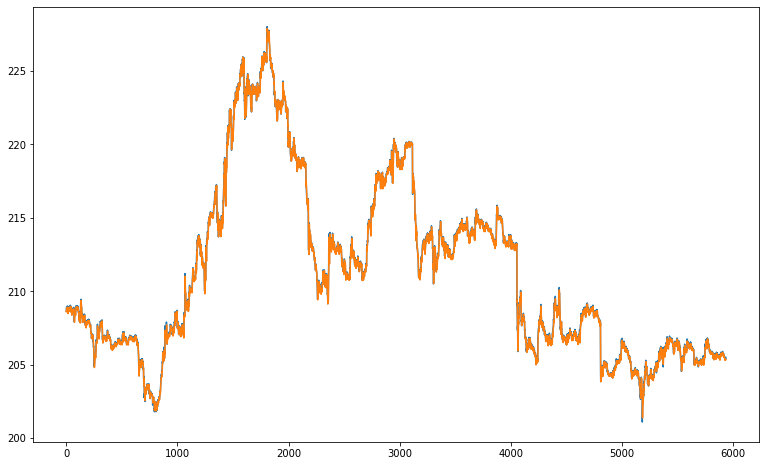

In [81]:
stock_symbol='ITC.NS'
seq_stock=seq_data[stock_symbol][:,:-1].reshape(len(seq_data[stock_symbol]),60,1)
pred=model.predict(np.asarray(seq_stock).astype(np.float32))
actual=seq_data[stock_symbol][:,-1]

pred=scaler[stock_symbol].inverse_transform(pred)
actual=scaler[stock_symbol].inverse_transform(actual.reshape(-1,1))

plt.figure(figsize=(13, 8))

plt.plot(actual)
plt.plot(pred,)

plt.show()

In [82]:
model.save('stox.h5')